<a href="https://colab.research.google.com/github/kakods/Oxford-102-Flowers/blob/master/fine_grained_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
path=untar_data(URLs.FLOWERS)

In [3]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-102-flowers/jpg'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/valid.txt'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/test.txt'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/train.txt')]

In [8]:
path/'train.txt'

PosixPath('/root/.fastai/data/oxford-102-flowers/train.txt')

In [0]:
df=DataFrame(np.loadtxt(path/'train.txt',dtype='str').tolist())

In [51]:
df.head()

,0,1
0,jpg/image_03860.jpg,16
1,jpg/image_06092.jpg,13
2,jpg/image_02400.jpg,42
3,jpg/image_02852.jpg,55
4,jpg/image_07710.jpg,96


In [0]:
img=open_image(path/'jpg/image_03860.jpg')

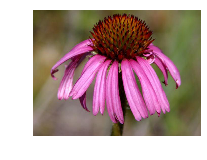

In [53]:
img.show()

In [54]:
img.size

torch.Size([500, 667])

In [0]:
valid_df=DataFrame(np.loadtxt(path/'valid.txt',dtype='str').tolist())

In [0]:
valid_df['is_valid']=True

In [57]:
valid_df.head()

,0,1,is_valid
0,jpg/image_04467.jpg,89,True
1,jpg/image_07129.jpg,44,True
2,jpg/image_05166.jpg,4,True
3,jpg/image_07002.jpg,34,True
4,jpg/image_02007.jpg,79,True


In [0]:
df['is_valid']=False

In [59]:
df.head()

,0,1,is_valid
0,jpg/image_03860.jpg,16,False
1,jpg/image_06092.jpg,13,False
2,jpg/image_02400.jpg,42,False
3,jpg/image_02852.jpg,55,False
4,jpg/image_07710.jpg,96,False


In [0]:
df=df.append(valid_df)

In [62]:
df = df.reindex(np.random.permutation(df.index))

ValueError: ignored

In [64]:
df.tail()

,0,1,is_valid
1015,jpg/image_08182.jpg,61,True
1016,jpg/image_07029.jpg,38,True
1017,jpg/image_05956.jpg,67,True
1018,jpg/image_06051.jpg,13,True
1019,jpg/image_07724.jpg,96,True


In [0]:
data=(ImageList.from_df(df,path)
               .split_from_df()
               .label_from_df()
               .transform(get_transforms(),size=224)
               .add_test_folder()
               .databunch(bs=64).normalize(imagenet_stats))

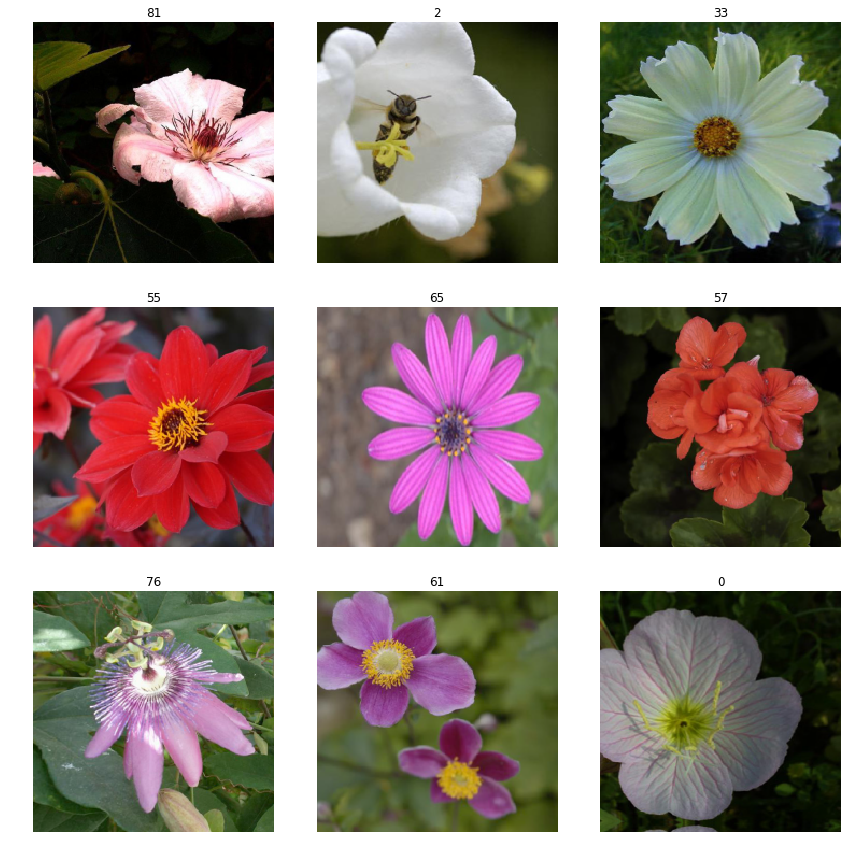

In [66]:
data.show_batch(rows=3)

In [0]:
learn=cnn_learner(data,models.resnet34,metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


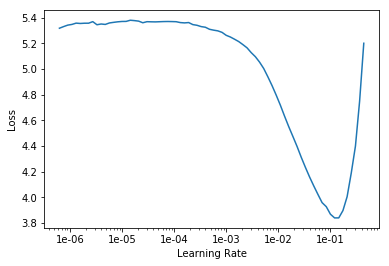

In [70]:
learn.lr_find()
learn.recorder.plot()

In [78]:
learn.fit_one_cycle(10,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.920015,3.824430,0.241176,00:42
1,3.647774,1.581006,0.662745,00:43
2,2.490029,1.030066,0.724510,00:43
3,1.738243,0.728566,0.803922,00:43
4,1.270067,0.762876,0.780392,00:42
5,0.950657,0.611925,0.823529,00:42
6,0.715332,0.530208,0.857843,00:42
7,0.542437,0.458421,0.873529,00:42
8,0.411556,0.428304,0.876471,00:42
9,0.320401,0.426387,0.872549,00:42


In [0]:
learn.save('stage-1')

In [0]:
learn=learn.load('stage-1')

In [0]:
learn.unfreeze()

In [116]:
learn.fit_one_cycle(10,slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.082683,0.507491,0.867647,00:44
1,0.084270,0.488587,0.873529,00:44
2,0.077452,0.460341,0.874510,00:44
3,0.079347,0.447122,0.882353,00:43
4,0.073753,0.435377,0.880392,00:44
5,0.064030,0.430369,0.885294,00:44
6,0.061427,0.423812,0.882353,00:43
7,0.057094,0.422700,0.887255,00:43
8,0.054776,0.423703,0.884314,00:43
9,0.051547,0.423123,0.884314,00:43


In [0]:
learn.save('stage-2')

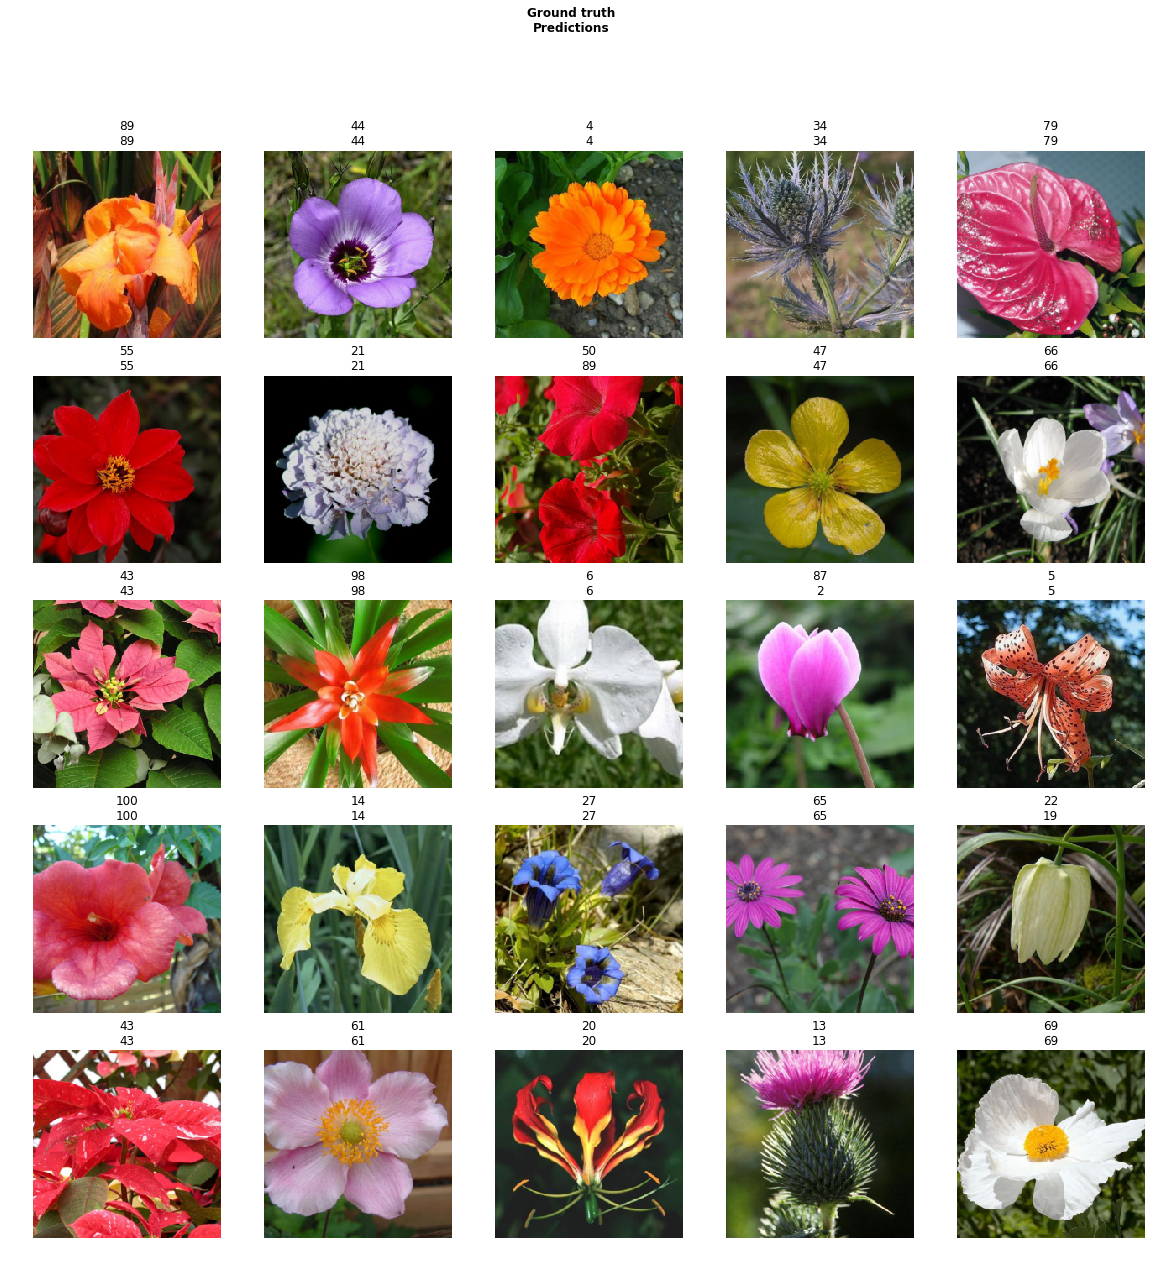

In [118]:
learn.show_results()

In [0]:
df=DataFrame(np.loadtxt(path/'train.txt',dtype='str').tolist())

In [0]:
test_df=DataFrame(np.loadtxt(path/'test.txt',dtype='str').tolist())

In [0]:
df['is_valid']=False
test_df['is_valid']=True
df=df.append(test_df)

In [0]:
test_data=(ImageList.from_df(df,path)
                    .split_from_df()
                    .label_from_df()
                    .transform(get_transforms(),size=224)
                    .databunch(bs=64).normalize(imagenet_stats))

In [0]:
learn=learn.load('stage-2')

In [124]:
learn.validate(test_data.valid_dl)

[0.4758848, tensor(0.8718)]